In [1]:
from sympy import *
init_printing()

### Notation

$d_q$: queuing delay

$w$: congestion window

$R_m$: minimum RTT (propagation delay)

$\mu$: link rate

$B = \mu R_m$: BDP

$R = w/\mu$: RTT

Note, $d_q = \left(\frac{w - B}{\mu}\right)^+$


### Stability condition

For an instant TCP, let $\tau(d_q, w)$ give the target congestion window. It is stable only if 

$$ -\frac{\pi}{2} < \frac{d \tau(d_q, w)}{d w} < 0 $$

Remember, we need to consider $d_q$'s dependence on $w$ in the derivative.

In [2]:
d_q, w, R_m, mu, B, R = symbols('d_q w R_m \\mu B R')

# Some identities. Notation: (LHS, RHS) for the identity LHS=RHS
ident_B = (B, mu * R_m)
ident_R_m = (R_m, B / mu)
ident_R = (R, w / mu)
ident_d_q = (d_q, (w - B) / mu)

### Sqrt Instant TCP
Consider an instant TCP of the form $\tau(d_q, w) = \frac{\alpha(w) R}{\sqrt{d_q}}$. We need to find $\alpha(w)$ such that this is stable. We picked sqrt because we believe that it will lead to a unique equilibrium point irrespective of the number of senders.

**Note:** Turns out this intuition was wrong, since when we solve for $\alpha$, we get a $w$ in the numerator which leads to infinitely many solutions. This leads to unfairness. Note, this doesn't occur if we have a lower bound on BDP

Now, assume that, instead of writing $\alpha$ as a function of cwnd, we can write it in terms of the BDP, $B$. In some cases, this will still lead to a stable solution.


In [3]:
tau, alpha = symbols('\\tau \\alpha')

tau = alpha * R / sqrt(d_q)

Let us first find the equilibirum cwnd size for this, $w_0$

In [4]:
eqn = (tau - w).subs(d_q, (w - B) / mu).subs(R, w/mu)
w_0 = solve(eqn, w)[1]
w_0

Now, to apply the stability condition we differentiate $\tau$, set it to $-\pi/2$ and solve for $\alpha$

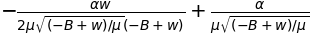

In [5]:
# Differentiate
dtau_dw = diff(tau.subs(d_q, (w - B) / mu).subs(R, w/mu), w)
dtau_dw

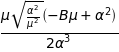

In [6]:
# Substitute w_0 and simplify
dtau_dw__2 = simplify(dtau_dw.subs(w, w_0))
dtau_dw__2

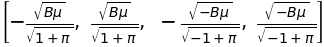

In [7]:
# Set to pi/2 and solve for alpha
alpha_solns = solve(dtau_dw__2 - pi / 2, alpha)
alpha_solns

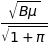

In [21]:
# Pick the real and positive solution
alpha_soln = alpha_solns[1]
alpha_soln

We now have an alpha for which this algorithm should be stable. Let's see what the resultant $tau(d_q, w)$ looks like

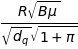

In [9]:
tau_with_B = tau.subs(alpha, alpha_soln)
tau_with_B

In practice, we estimate $B$ as $B = w * R_m / R$. Let's plug that in

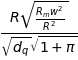

In [10]:
simplify(tau_with_B.subs(B, w * R_m / R).subs(mu * R_m, B).subs(B, w * R_m / R))

### General Instant TCP
Following the pattern we notice for copa and sqrt, we conjecture a general form as:

$$ \tau = k * w * \left(\frac{R_m}{d_q}\right)^m $$

Note, we assume that the power of $w$ is going to be 1, since that is what we saw previously

In [37]:
tau, alpha, k, l, m = symbols('\\tau \\alpha k l m')

# The base equation
tau = k * w * (R_m / d_q) ** m
tau

In [38]:
# tau in terms of B and w
tau_wB = tau.subs(*ident_d_q).subs(*ident_R_m)
tau_wB

In [39]:
# Solve for the equilibirum condition
w_eq = solve(tau_wB - w, w)[1]
#w_eq = B + a ** (1 / m) B
w_eq

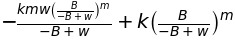

In [40]:
# Derivative of tau
dtau_dw = diff(tau.subs(*ident_d_q).subs(*ident_R_m), w)
dtau_dw

In [41]:
# Derivative at equilibrium
dtau_dw__2 = simplify(dtau_dw.subs(w, w_eq))
dtau_dw__2

In [42]:
# Find a k that satisfies that the derivative is smaller than pi / 2 for any m
solve(dtau_dw__2 - pi/2, k)